## 싸인 함수 회귀분석 (Sine Regression)

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

#### Package Import

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) 

2.0.0


## 데이터 생성

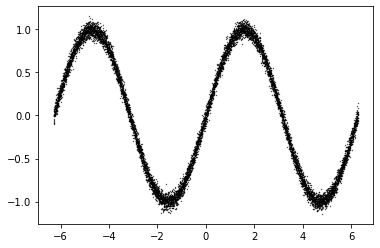

In [3]:
# generate the data
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

## 모델 정의

In [4]:
class Model(tf.Module):
    def __init__(self):
        # create variables
        initializer = tf.initializers.GlorotUniform()
        W0 = tf.Variable(initializer(shape=[1, 20]), dtype=tf.float32, name='W0')
        W1 = # your code
        W2 = # your code

        b0 = # your code
        b1 = # your code
        b2 = # your code

        self.weights = [W0, W1, W2]
        self.biases = [b0, b1, b2]
        self.activations = [tf.nn.relu, tf.nn.relu, None]
    
    def __call__(self, input):
        x = input
        for W, b, activation in zip(self.weights, self.biases, self.activations):
            # affine transformation (Hint : tf. matmul를 이용해서 작성)
            x = # your code
            # activation
            if activation is not None:
                x = # your code
        return x

SyntaxError: invalid syntax (<ipython-input-4-6e0bc5a5f773>, line 6)

## 모델 훈련

In [ ]:
model = Model()
optimizer = tf.optimizers.Adam() # create optimizer

# run training
batch_size = 32
for training_step in range(10000):
    # get a random subset of the training data
    indices = np.random.randint(low=0, high=len(inputs), size=batch_size)
    input_batch = tf.Variable(inputs[indices], dtype=tf.float32, name='input')
    output_batch = tf.Variable(outputs[indices], dtype=tf.float32, name='output')
    
    with tf.GradientTape() as tape:
        output_pred = model(input_batch)
        # mean squared loss (Hint : tf.reduce_mean와 tf.square를 이용해서 작성)
        mse = # your code
        # gradient 계산
        grads  = # your code
        # parameter update
        optimizer. # your code
        
    if training_step % 1000 == 0:
        print('{0:04d} mse: {1:.3f}'.format(training_step, mse))

## 테스트

In [ ]:
test_input = tf.Variable(inputs, dtype=tf.float32, name='input')
test_output = tf.Variable(outputs, dtype=tf.float32, name='Output')
test_output_pred = model(test_input)

plt.scatter(inputs[:, 0], test_output[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], test_output_pred[:, 0], c='r', marker='o', s=0.1)